<a href="https://colab.research.google.com/github/UmarMuazzad/Pemrograman_Python/blob/main/TubesMinggu14UmarMuazzad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Umar Muazzad Hasibuan
1101174480**

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
LtN= lambda x: 10**(x/10)

In [19]:
NtL= lambda x: 10*np.log10(x)

Pathloss function

In [20]:
def cos(frek,tipe,ht,hr,d,):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [21]:
# fq is the frequency (150-2000 MHz)
# ht is the height of antenna transmitter (30-200 m)
# hr is the height of antenna receiver (1-20 m)
# d is the distance between the transmitter and receiver in m

fq1=700 #Mhz
fq2=900 #Mhz
fq3=1800 #MHz
loc1='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #dots
d=np.random.randint(dmin,dmax,N)

print(d)

[487 841 424 489 421 659 545 975 465 639 589 960 673 783 414 765 948 550
 477 422 393 375 680 338 523 811 432 627 897 409 608 502 753 590 508 378
 399 849 976 680 452 637 368 919 773 435 456 754 815 914 809 352 714 411
 390 785 858 441 702 597 823 891 874 993 680 624 811 930 914 343 367 924
 343 572 544 683 329 976 323 926 427 971 311 832 920 416 685 823 681 560
 964 563 811 549 619 969 715 494 373 758 811 666 872 554 897 911 340 609
 918 425 578 366 327 775 707 550 412 855 685 521 477 337 647 917 543 433
 602 713 414 569 669 318 959 901 380 364 598 705 588 379 471 453 647 604
 831 740 365 871 920 841 355 923 728 443 318 551 629 950 927 318 593 493
 610 478 360 430 303 571 499 357 525 783 944 354 734 827 997 651 651 756
 617 753 748 433 547 418 838 911 637 346 588 655 591 642 315 948 442 707
 930 846]


In [22]:
# Define Pathloss Cost 231 Model for Area by the given input
LpUrban=cos(fq3,loc1,tower,user,d)
LpSubUrban=cos(fq3,loc2,tower,user,d)
LpOpen=cos(fq3,loc3,tower,user,d)

# Sort Distance for Area 
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSubUrban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

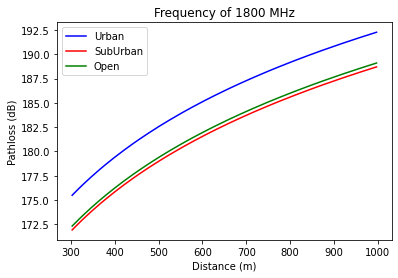

In [23]:
fig, ax = plt.subplots()
ax.plot(d_sort,Urban_sort, color='b', label='Urban')
ax.plot(d_sort,Suburban_sort, color='r', label='SubUrban')
ax.plot(d_sort,Open_sort, color='g', label='Open')
ax.set_title('Frequency of 1800 MHz')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Pathloss (dB)')
ax.legend(loc='upper left')
plt.show()

In [24]:
# Define Pathloss Cost 231 Model for Frequency (700MHz,900MHz,1800MHz)
LpUrbanFQ1=cos(fq1,loc1,tower,user,d)
LpUrbanFQ2=cos(fq2,loc1,tower,user,d)
LpUrbanFQ3=cos(fq3,loc1,tower,user,d)

# Sort Distance for Area 
d_sort=d[np.argsort(d)]
UrbanFQ_sort=LpUrbanFQ1[np.argsort(d)]
UrbanFQ2_sort=LpUrbanFQ2[np.argsort(d)]
UrbanFQ3_sort=LpUrbanFQ3[np.argsort(d)]

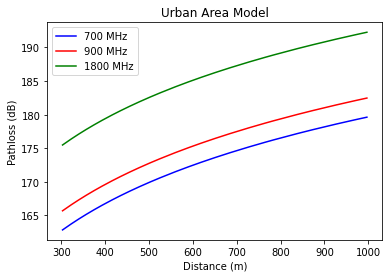

In [25]:
fig, ax = plt.subplots()
ax.plot(d_sort,UrbanFQ_sort, color='b', label='700 MHz')
ax.plot(d_sort,UrbanFQ2_sort, color='r', label='900 MHz')
ax.plot(d_sort,UrbanFQ3_sort, color='g', label='1800 MHz')
ax.set_title('Urban Area Model')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Pathloss (dB)')
ax.legend(loc='upper left')
plt.show()

Prx Function

In [26]:
def ValuePrX(Ptx,Pl,Gtx,Grx):
  
  # Convert Transmitter Power from mW to dBm
  PtdB=NtL(Ptx)
  
  # Calculating the Value of PrX
  PrX=PtdB - Pl + Gtx + Grx

  # Convert Receiver Power from dBm to mW 
  PrXmW=LtN(PrX)

  return PrXmW

In [27]:
# tx is the given transmitter power
# Pl is path loss 
# gtx is the given transmitter gain 
# grx is the given receiver gain 

tx = 30000 # mW
Pla = Urban_sort
Plb = Suburban_sort
Plc = Open_sort
Pld = UrbanFQ_sort
Ple = UrbanFQ2_sort
Plf = UrbanFQ3_sort
gtx = 10 # dB
grx = 2 # dB

In [28]:
# Power Received based on Area
PrxUrban = ValuePrX(tx, Pla, gtx, grx)
PrxSubUrban = ValuePrX(tx, Plb, gtx, grx)
PrxOpen = ValuePrX(tx, Plc, gtx, grx)

# Power Received based on Frequency
PrxUrban700  = ValuePrX(tx, Pld, gtx, grx)
PrxUrban900  = ValuePrX(tx, Ple, gtx, grx)
PrxUrban1800 = ValuePrX(tx, Plf, gtx, grx)

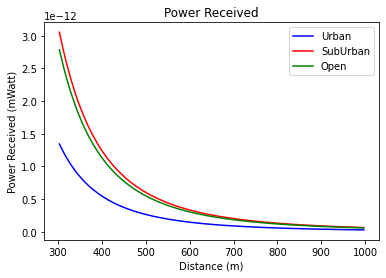

In [29]:
fig, ax = plt.subplots()
ax.plot(d_sort,PrxUrban, color='b', label='Urban')
ax.plot(d_sort,PrxSubUrban, color='r', label='SubUrban')
ax.plot(d_sort,PrxOpen, color='g', label='Open')
ax.set_title('Power Received')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Power Received (mWatt)')
ax.legend(loc='upper right')
plt.show()

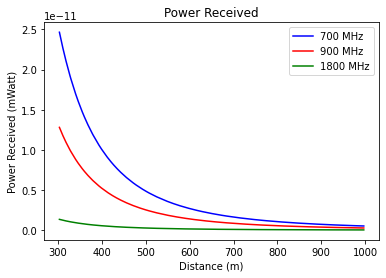

In [30]:
fig, ax = plt.subplots()
ax.plot(d_sort,PrxUrban700, color='b', label='700 MHz')
ax.plot(d_sort,PrxUrban900, color='r', label='900 MHz')
ax.plot(d_sort,PrxUrban1800, color='g', label='1800 MHz')
ax.set_title('Power Received')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Power Received (mWatt)')
ax.legend(loc='upper right')
plt.show()

SNR function

In [31]:
def SNRf(Prx,BW):

  # Calculating No to BW
  No=-174+10*np.log10(BW)

  # Converting No in BW to Numeric
  NoW=LtN(No)

  # Calculating SNR Value
  SNR= Prx/NoW

  return SNR

In [32]:
# Input for the SNR Model

# prx is the power received 
# bw is the given bandwith value

Prx1 = PrxUrban
Prx2 = PrxSubUrban
Prx3 = PrxOpen
Prx4 = PrxUrban700
Prx5 = PrxUrban900
Prx6 = PrxUrban1800
BW   = 50000000

In [33]:
# Define SNR Model for Area by the given input
SNRUrban = SNRf(Prx1,BW)
SNRSubUrban = SNRf(Prx2,BW)
SNROpen = SNRf(Prx3,BW)

# Define SNR Model for Frequency by the given input
SNRUrban700 = SNRf(Prx4,BW)
SNRUrban900 = SNRf(Prx5,BW)
SNRUrban1800 = SNRf(Prx6,BW)

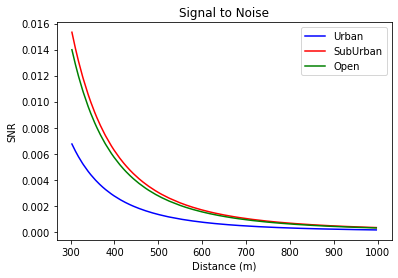

In [34]:
fig, ax = plt.subplots()
ax.plot(d_sort,SNRUrban, color='b', label='Urban')
ax.plot(d_sort,SNRSubUrban, color='r', label='SubUrban')
ax.plot(d_sort,SNROpen, color='g', label='Open')
ax.set_title('Signal to Noise')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('SNR')
ax.legend(loc='upper right')
plt.show()

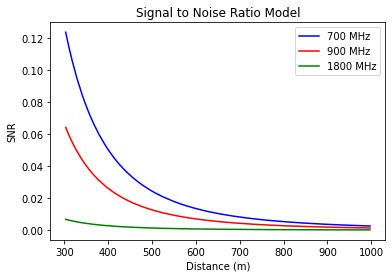

In [35]:
fig, ax = plt.subplots()
ax.plot(d_sort,SNRUrban700, color='b', label='700 MHz')
ax.plot(d_sort,SNRUrban900, color='r', label='900 MHz')
ax.plot(d_sort,SNRUrban1800, color='g', label='1800 MHz')
ax.set_title('Signal to Noise Ratio Model')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('SNR')
ax.legend(loc='upper right')
plt.show()

Capacity Function

In [36]:
 def Capacity(SNR,BW):
    # Cell Capacity
  Celcap = BW*np.log2(1+SNR)
  return Celcap

In [37]:
# Input of the Capacity

# SNR is the signal to noise ratio 
# BW is the given bandwith value

SNR1 = SNRUrban
SNR2 = SNRSubUrban
SNR3 = SNROpen
SNR4 = SNRUrban700
SNR5 = SNRUrban900
SNR6 = SNRUrban1800
BW   = 50000000

In [38]:
# Cell Capacity Model based on Area
celcapUrban = Capacity(SNR1, BW)
celcapSubUrban = Capacity(SNR2, BW)
celcapOpen = Capacity(SNR3, BW)

# Cell Capacity Model based on Frequency
celcapUrban700 = Capacity(SNR4, BW)
celcapUrban900 = Capacity(SNR5, BW)
celcapUrban1800 = Capacity(SNR6, BW)

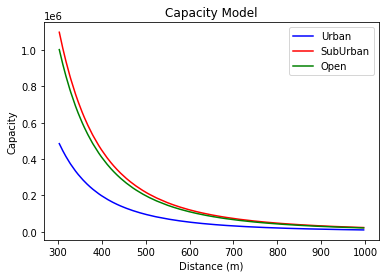

In [39]:
fig, ax = plt.subplots()
ax.plot(d_sort,celcapUrban, color='b', label='Urban')
ax.plot(d_sort,celcapSubUrban, color='r', label='SubUrban')
ax.plot(d_sort,celcapOpen, color='g', label='Open')
ax.set_title('Capacity Model')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Capacity')
ax.legend(loc='upper right')
plt.show()

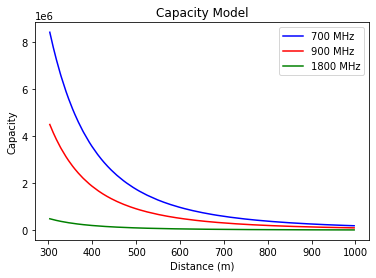

In [40]:
fig, ax = plt.subplots()
ax.plot(d_sort,celcapUrban700, color='b', label='700 MHz')
ax.plot(d_sort,celcapUrban900, color='r', label='900 MHz')
ax.plot(d_sort,celcapUrban1800, color='g', label='1800 MHz')
ax.set_title('Capacity Model')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Capacity')
ax.legend(loc='upper right')
plt.show()